# DD2367 - Programing Assignment III: Quantum Arithmetics, QFT & Quantum walk #

Authors: Scott McHaffie, Jai Iyer, Venkatesh Elayaraja

In [8]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from circleNotationClass import QubitSystem
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

# Function to get statevector from Aer simulator
def statevector_from_aer(circ: QuantumCircuit) -> np.ndarray:
    backend = Aer.get_backend("aer_simulator_statevector")
    tqc = transpile(circ, backend)
    result = backend.run(tqc).result()
    return np.asarray(result.get_statevector(tqc), dtype=np.complex128)

DTYPE = np.complex128

# **Task 1:** Quantum Arithmetics


This exercise aims to implement 3-qubit increment and decrement operators, =+ -=, using the IBM Qiskit framework and its Aer quantum computer simulator.

---

## **Task 1.1:** Increment and Decrement Operators

1. Prepare a superposition of quantum states using HAD QPU instructions. You can decide freely which superposition. This will determine the concurrent increment or decrement operator.

In [3]:
# Initialise 3-qubit register
qc_id = QuantumCircuit(3)

# Create superposition  of |0> and |4> states
qc_id.h(2)


2. Plot the quantum states using the circle notation. 

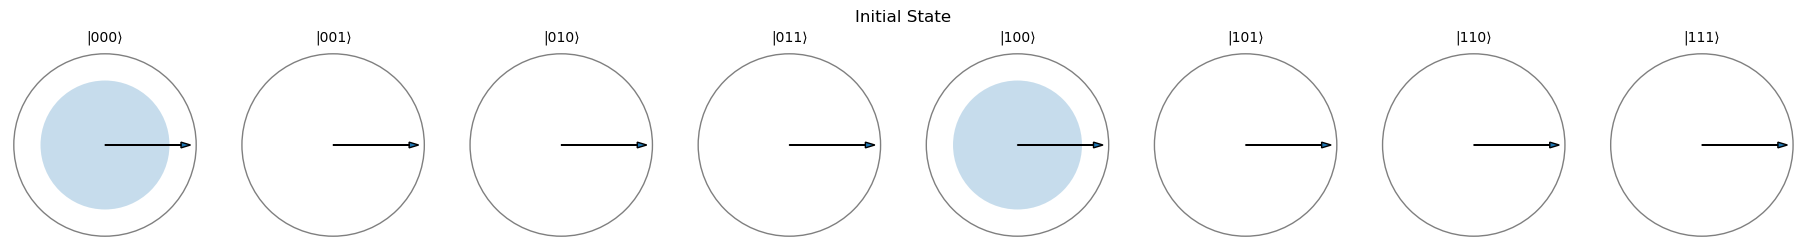

In [4]:
# Save copy of the circuit and get statevector
qc_init = qc_id.copy()
qc_init.save_statevector()
qc_id_state = statevector_from_aer(qc_init)

# Plot statevector in circle notation
QubitSystem(qc_id_state, label='Initial State').viz_circle()

3. Perform an increment operation (by 1) +=

In [5]:
## INCREMENT CIRCUIT ##

# Step 1: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_id.ccx(0, 1, 2)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_id.cx(0, 1)

# Step 3: Apply X gate | Target Qubit: 0
qc_id.x(0)

4. Plot the quantum states using the circle notation. 

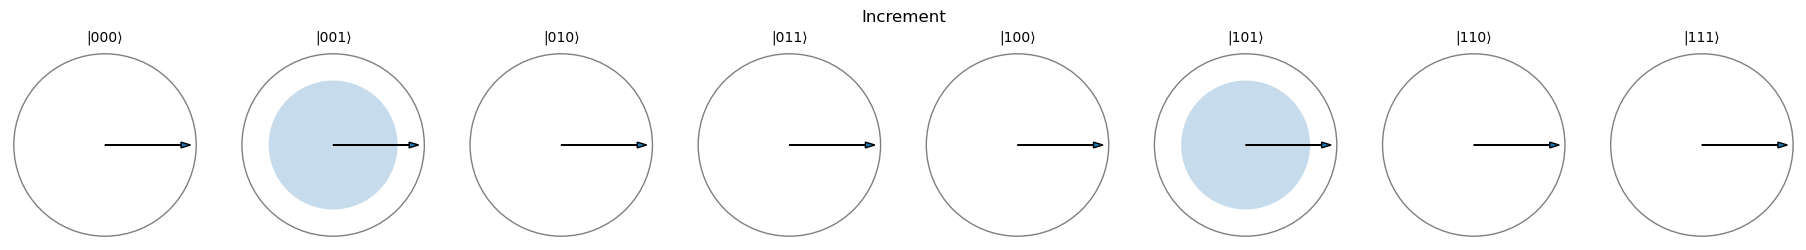

In [6]:
# Save copy of the circuit and get statevector
qc_increment = qc_id.copy()
qc_increment.save_statevector()
qc_id_state = statevector_from_aer(qc_increment)

# Plot statevector in circle notation
QubitSystem(qc_id_state, label='Increment').viz_circle()

5. Perform a decrement operation (by 1) -=

In [7]:
## DECREMENT CIRCUIT ##

# Step 1: Apply X gate | Target Qubit: 0
qc_id.x(0)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_id.cx(0, 1)

# Step 3: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_id.ccx(0, 1, 2)

6. Plot the quantum states using the circle notation. 

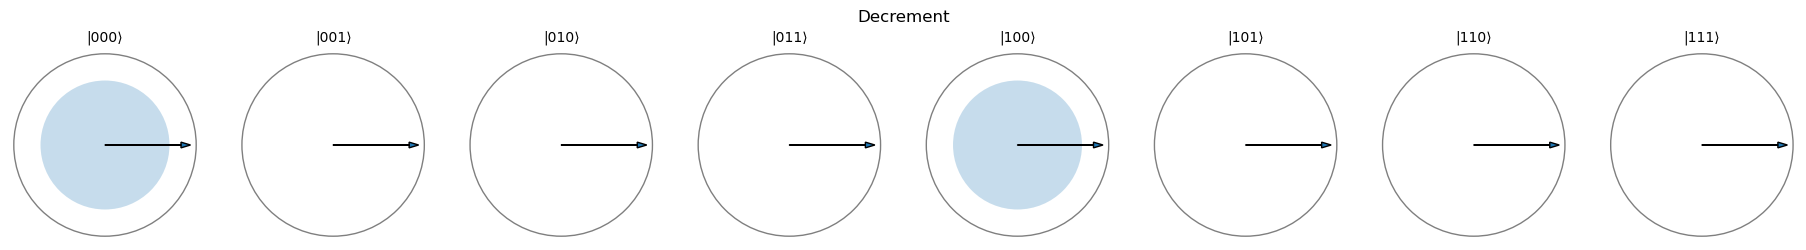

In [8]:
# Save copy of the circuit and get statevector
qc_decrement = qc_id.copy()
qc_decrement.save_statevector()
qc_id_state = statevector_from_aer(qc_decrement)

# Plot statevector in circle notation
QubitSystem(qc_id_state, label='Decrement').viz_circle()

## **Task 1.2** - Overflow & Underflow / Negative Numbers

---

**1.** What happens if we have an overflow (for the increment) or underflow (for the decrement)? Show the results of the overflow and underflow with an experiment.

### **Increment Overflow**. 
We demonstrate the result of *increment overflow* on the 3-qubit register using the **top state** $\ket {7} = \ket {111}$, and applying 1 increment on the state.

- Step 1: Initialize 3-qubit register with state $\ket {111}$

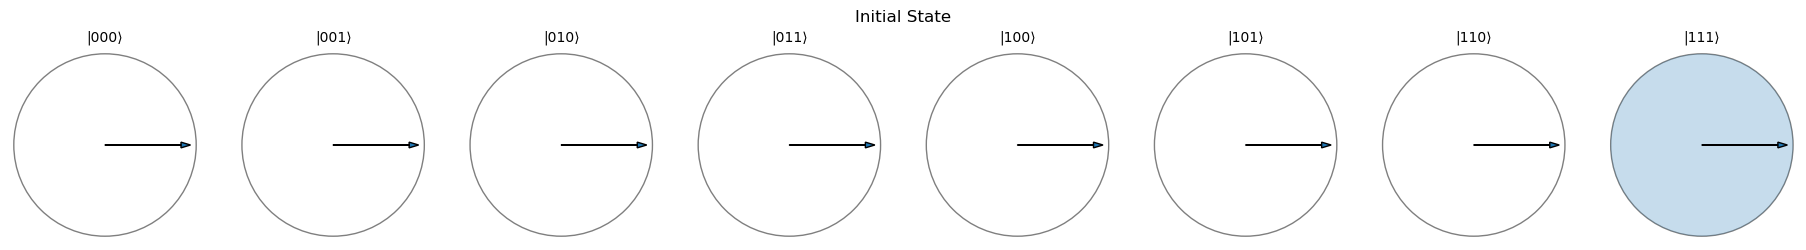

In [9]:
# Initialise 3-qubit register to demonstratre increment overflow
qc_inc_over = QuantumCircuit(3)

# Initialise to |7> state
qc_inc_over.x([0, 1, 2])

# Plot initial statevector in circle notation
qc_inc_over_init = qc_inc_over.copy()
qc_inc_over_init.save_statevector()
qc_inc_over_state = statevector_from_aer(qc_inc_over_init)
QubitSystem(qc_inc_over_state, label='Initial State').viz_circle()

- Step 2: Increment state by $+1$

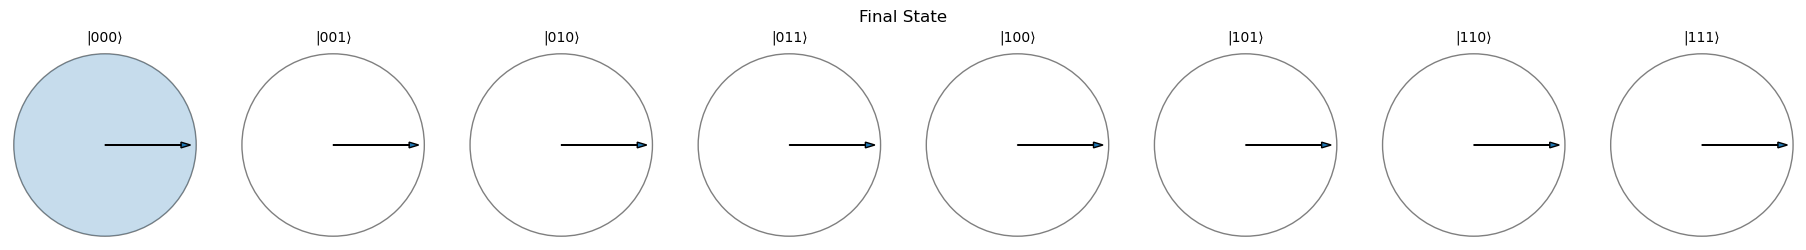

In [10]:
## INCREMENT CIRCUIT ##

# Step 1: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_inc_over.ccx(0, 1, 2)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_inc_over.cx(0, 1)

# Step 3: Apply X gate | Target Qubit: 0
qc_inc_over.x(0)

# Plot statevector in circle notation
qc_inc_over_final = qc_inc_over.copy()
qc_inc_over_final.save_statevector()
qc_inc_over_state = statevector_from_aer(qc_inc_over_final)
QubitSystem(qc_inc_over_state, label='Final State').viz_circle()

**Increment Circuit Diagram**

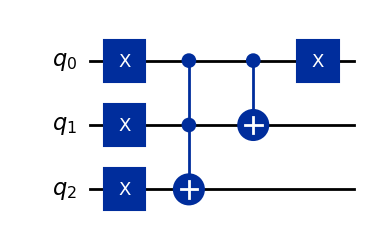

In [11]:
# Plot circuit
qc_inc_over.draw(output='mpl')

**Remarks.** Applying the increment circuit on the top state $\ket {111}$ cycles the system back to the bottom state $\ket {000}$. The increment circuit on the 3-qubit register effectively acts as **addition modulo 8**, which cycles through the computational basis states in the forward sense ($+1$ per increment).

### **Decrement Underflow**. 
From the above result, we can conclude that decrement underflow results in **cycling backwards** through the computational basis states. This is because the decrement circuit is simply the **inverse operation** of the increment circuit. We demonstrate this result by applying the decrement circuit to the bottom state $\ket {000}$.

- Step 1: Initialize 3-qubit register with state $\ket {000}$

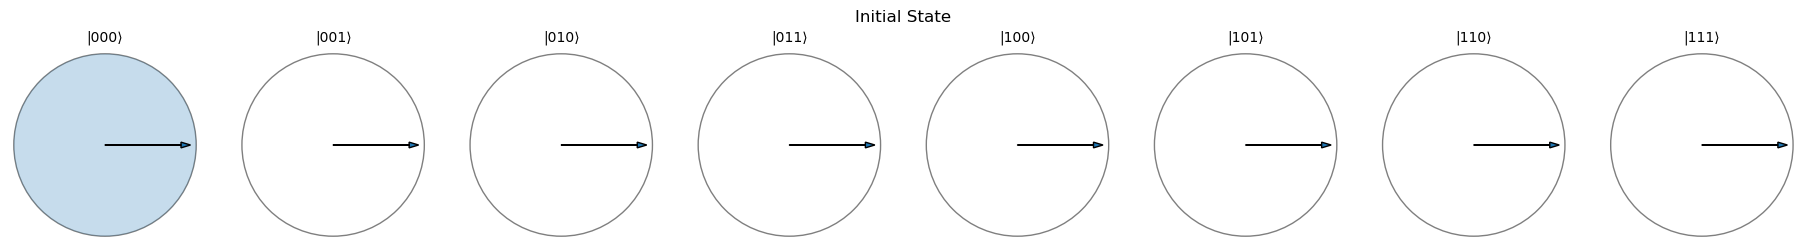

In [12]:
# Initialise 3-qubit register to demonstrate increment overflow
qc_dec_under = QuantumCircuit(3)

# Plot initial statevector in circle notation
qc_dec_under_init = qc_dec_under.copy()
qc_dec_under_init.save_statevector()
qc_dec_under_state = statevector_from_aer(qc_dec_under_init)
QubitSystem(qc_inc_over_state, label='Initial State').viz_circle()

- Step 2: Decrement state by $-1$

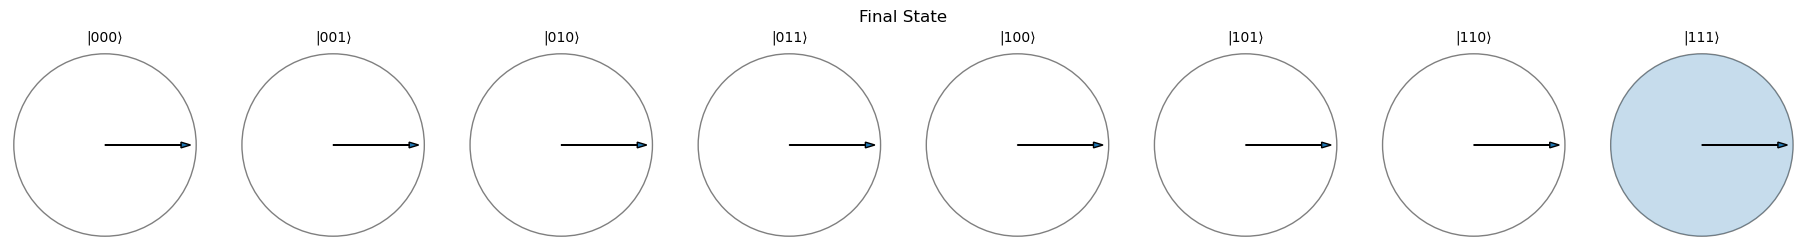

In [13]:
## DECREMENT CIRCUIT ##

# Step 1: Apply X gate | Target Qubit: 0
qc_dec_under.x(0)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_dec_under.cx(0, 1)

# Step 3: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_dec_under.ccx(0, 1, 2)

# Plot final statevector in circle notation
qc_dec_under_final = qc_dec_under.copy()
qc_dec_under_final.save_statevector()
qc_dec_under_state = statevector_from_aer(qc_dec_under_final)
QubitSystem(qc_dec_under_state, label='Final State').viz_circle()

**Decrement Circuit Diagram**

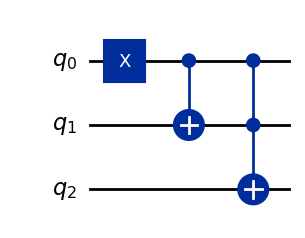

In [14]:
# Plot circuit
qc_dec_under.draw(output='mpl')

**Remarks.** The decrement circuit applied to the initial state $\ket {000}$ results in the final state $\ket {111}$, as predicted. Hence, we conclude that decrement underflow results in **cycling backwards through the computational basis states**. 

**2.** Do increment and decrement operations also work with negative integer numbers? Motivate with an example.

**Remarks.** Yes, the increment and decrement operations also work with negative integers encoded using the **Two's Complement Encoding**. We can see this through the results of task 1.1, by *re-interpreting* the 3-qubit computational basis states as corresponding to the integers $\{-4, \dots, 3\}$ as:

$$  
    \begin{align*}
        \ket {000} &\rightarrow 0 \\
        \ket {001} &\rightarrow 1 \\
        \ket {010} &\rightarrow 2 \\
        \ket {011} &\rightarrow 3 \\
        \ket {100} &\rightarrow -4 \\
        \ket {101} &\rightarrow -3 \\
        \ket {110} &\rightarrow -2 \\
        \ket {111} &\rightarrow -1 \\
    \end{align*}
$$

In this encoding, the increment circuit results in cycling through the integers in the **forward sense** as:

$$
    -4 \rightarrow -3 \rightarrow \dots \rightarrow +3 \rightarrow -4
$$

Consequently, the decrement circuit results in cycling through the integers in the **backward sense** as:

$$
    3 \rightarrow 2 \rightarrow \dots \rightarrow -4 \rightarrow +3
$$

---


# **Task 2:** Quantum Fourier Transform (QFT)

The goal of this exercise is to compute a 4-qubit QFT on a sinusoidal signal (encoded in the phase) using IBM Qiskit and plot the resulting state.  As part of this task, develop a four-qubit QFT and preparation circuit as in the circuit below.

---


# **Task 2.1** $-$ QFT and Preparation Circuit

---

**1.** Briefly describe the QFT circuit design, including the preparation gates and QFT.

### **The QFT Circuit Design**. 

The QFT circuit allows us to access hidden patterns stored inside the relative phases and magnitudes of a register of qubits. 

The first step of the QFT is the preparation stage, where we apply Hadamard gates on each qubit to ensure there is an equal probability measuring each register state. We then apply ROT gates to encode our signal in the phase of each quantum state.

After the phase encoding the QFT procedure is applied to transform the state into the Fourier basis, revealing information which is encoded in either the phase or the magnitude of the quantum states. This is done by applying four blocks of hadamard and CPHASE gates to down-sample the signal by 1/2. Finally, swap gates are applied to reverse the qubit order.

---


**2.** Print the circuit diagram.

In the cell below QFT circuit is created and the circuit diagram is shown.

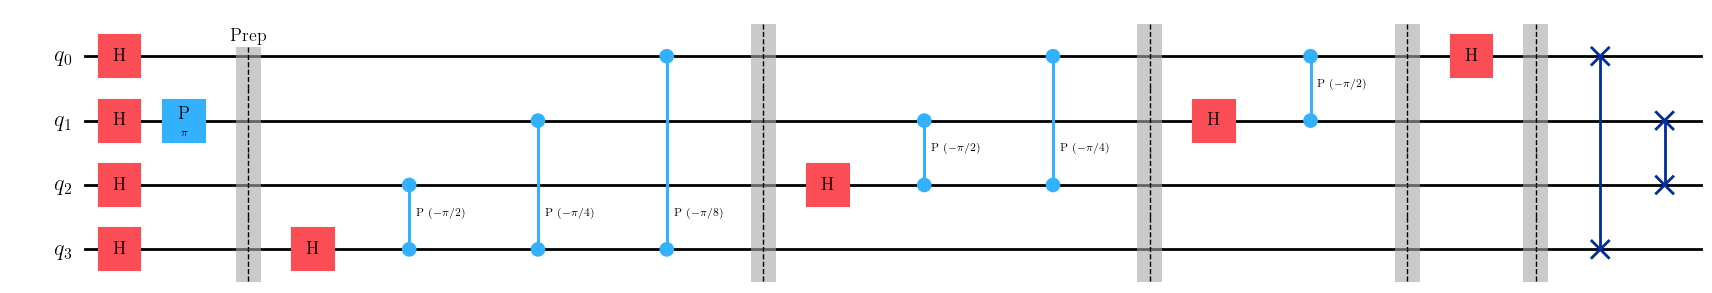

In [58]:
qc_id = QuantumCircuit(3, name="R")

qc_qft = QuantumCircuit(4, name="QFT")

# prep signal
qc_qft.h([0, 1, 2, 3])
qc_qft.p(np.pi, 1)
qc_signal = qc_qft.copy()
qc_qft.barrier([0,1,2,3], label="Prep")

# QFT
qc_qft.h(3)
qc_qft.cp(-np.pi/2, 2, 3)
qc_qft.cp(-np.pi/4, 1, 3)
qc_qft.cp(-np.pi/8, 0, 3)
qc_qft.barrier([0,1,2,3])

qc_qft.h(2)
qc_qft.cp(-np.pi/2, 1, 2)
qc_qft.cp(-np.pi/4, 0, 2)
qc_qft.barrier([0,1,2,3])

qc_qft.h(1)
qc_qft.cp(-np.pi/2, 0, 1)
qc_qft.barrier([0,1,2,3])

qc_qft.h(0)
qc_qft.barrier([0,1,2,3])

qc_qft.swap(0, 3)
qc_qft.swap(1, 2)
# qc_qft.barrier([0,1,2,3], label="QFT")

qc_qft.draw(output="mpl")


# **Task 2.2** $-$ Circle Notation

---

**1.** Prepare and plot the input state using circle notation.

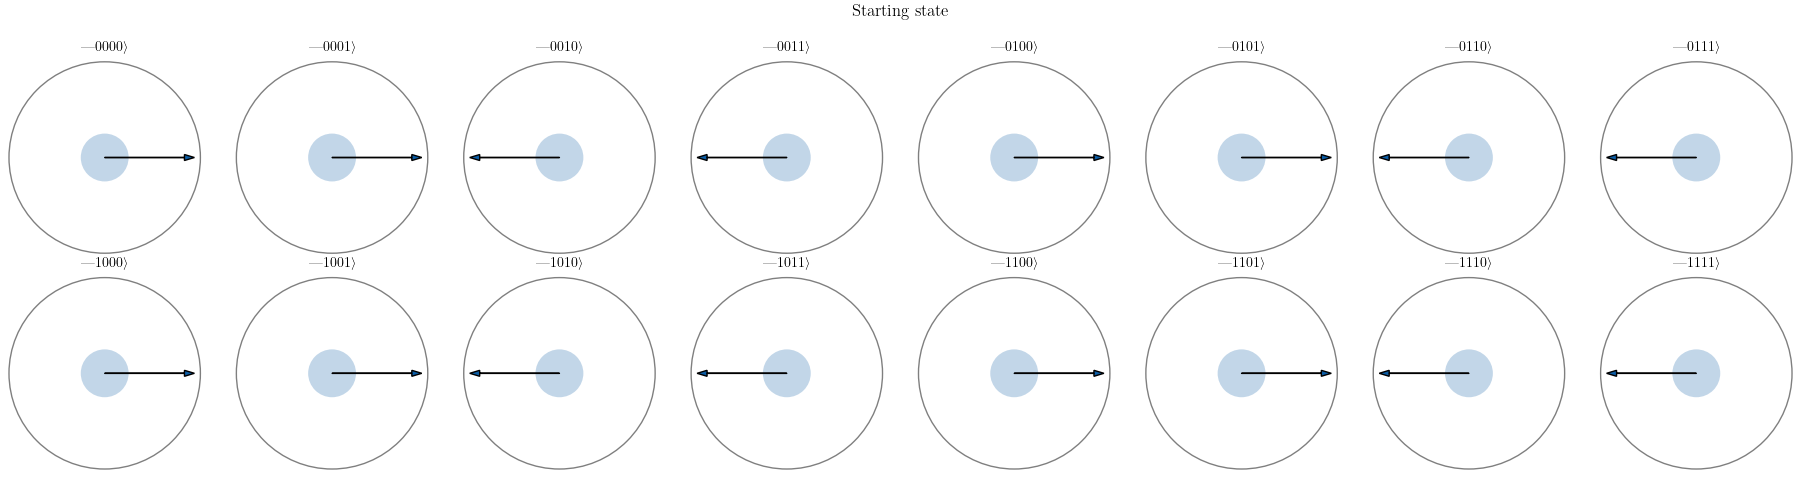

In [59]:
qc_signal.save_statevector()
signal_sv = statevector_from_aer(qc_signal)
QubitSystem(signal_sv, label="Starting state").viz_circle()

The circle notation shows that the signal is entirely real, with state amplitudes of either 0.25 or -0.25. It appears that a trapezoidal wave is being generated, with a single frequency.

**2.** Perform the QFT and plot the results using circle notation.

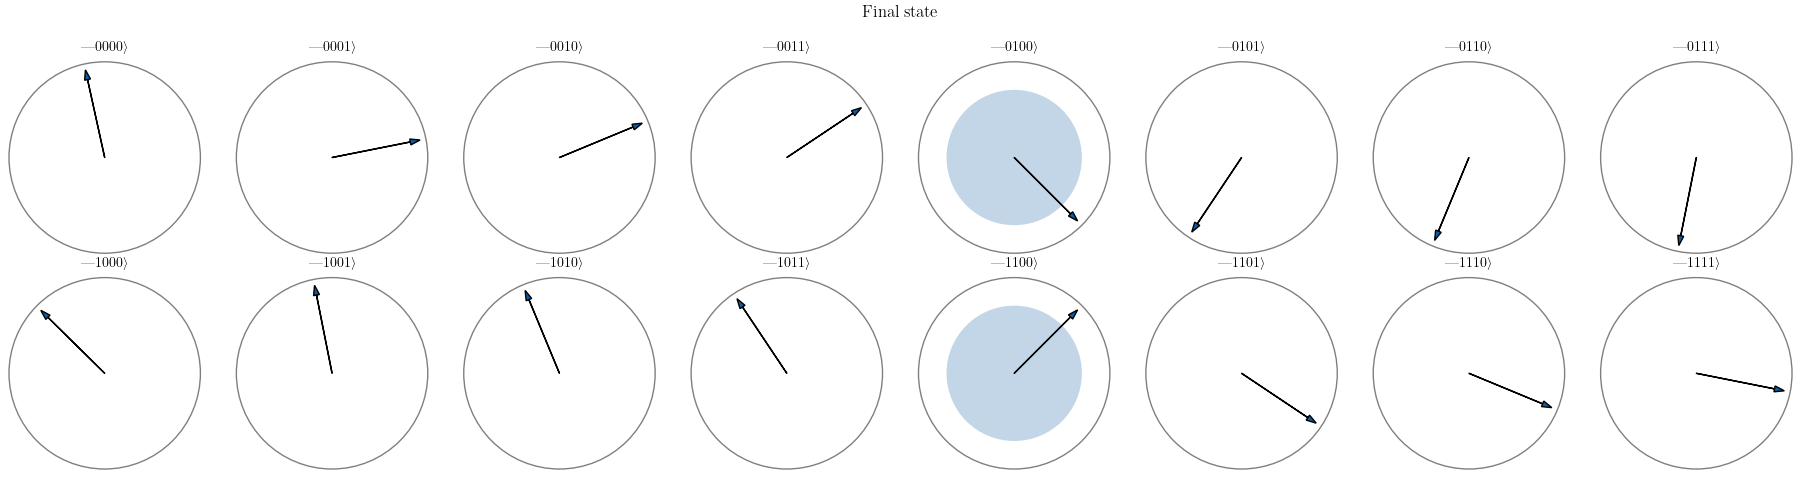

In [60]:
# copy qft circuit and get statevector
qft_copy = qc_qft.copy()

# Convert numpy array to a Qiskit Statevector object
qft_statevector = Statevector(qft_copy)

# print (qft_sv_reordered)
QubitSystem(qft_statevector, label="Final state").viz_circle()

Here we can see that we are extracting a single frequency from the QFT, in frequency bin $|4\rangle$. Since the QFT was performed on a real-valued signal there is the characteristic mirrored peak in frequency bin $|12\rangle$ as well.

# **Task 2.3** $-$ Discussion

Provide a brief discussion of the results, including a comparison with traditional DFT and FFT.

---

First, let's visualize the quantum state values as a function of the register index. This is shown in the cell below and we can see that we indeed obtain a trapezoidal wavefunction.

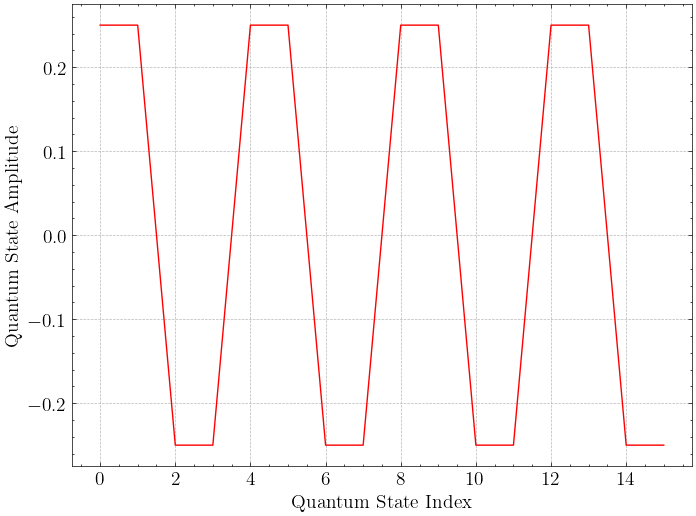

In [ ]:
# plot the quantum state amplitude as a function of the state index, to visualize the signal
plt.figure(figsize = (8, 6))
plt.plot(np.arange(16), np.real(signal_sv), 'r')
plt.xlabel("Quantum State Index"); plt.ylabel("Quantum State Amplitude")
plt.grid(True)
plt.show()

# # sampling rate
# sr = 16
# # sampling interval
# ts = 1.0/sr
# t = np.arange(0,1,ts)

# plt.figure(figsize = (8, 6))
# plt.plot(t, np.real(signal_sv), 'r')
# plt.xlabel("Time [s]"); plt.ylabel("Quantum State Amplitude")
# plt.grid(True)
# plt.show()

Now, we can perform the DFT on the original signal. We see again that there is a peak in frequency bin 4, and the mirrored peak in frequency bin 12, which agrees with our results from the QFT.

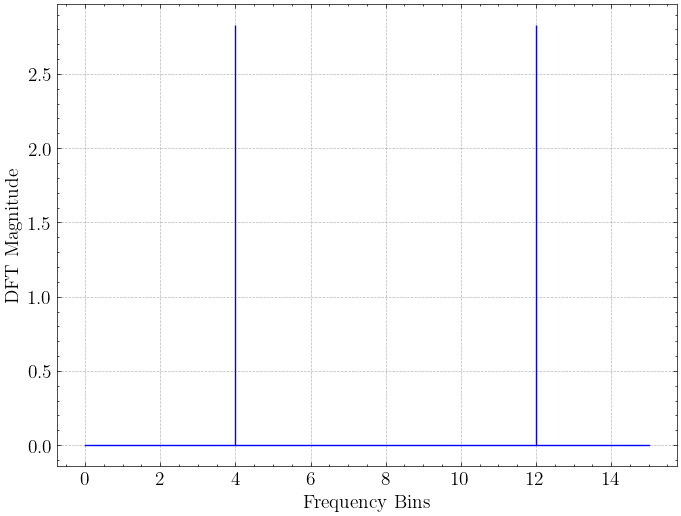

In [55]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

# do the DFT
X = DFT(signal_sv)

# get the frequency array
# N = len(X)
# n = np.arange(N)
# T = N/sr
# freq = n/T 

bins = np.arange(len(signal_sv))

# plot the DFT
plt.figure(figsize = (8, 6))
plt.stem(bins, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency Bins'); plt.ylabel('DFT Magnitude')
plt.grid()
plt.show()

Finally, we can perform the FFT on the original signal. We see again that there is a peak in frequency bin 4, and the mirrored peak in frequency bin 12, which agrees with our results from both the QFT and the DFT. The QFT works!!

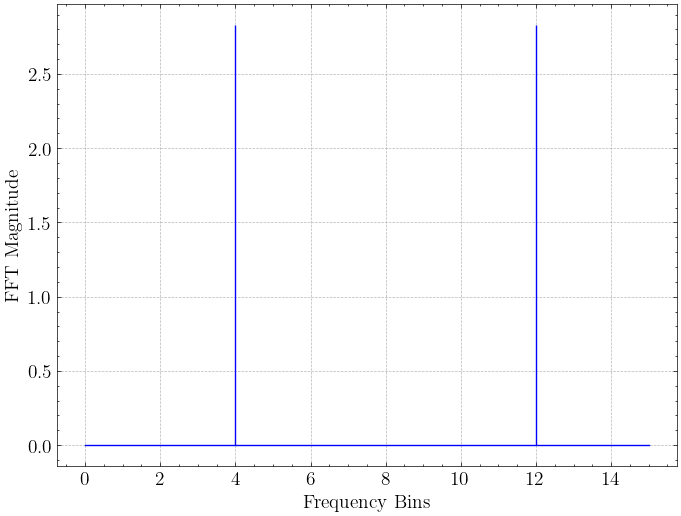

In [56]:
# do the fft, using 16 frequency bins
fft_result = np.fft.fft(np.real(signal_sv))
# fft_freq = np.fft.fftfreq(len(signal), d=1/16)  # d=1 sample spacing
bins = np.arange(len(signal_sv))

# Plot
plt.figure(figsize=(8,6))
plt.stem(bins, np.abs(fft_result), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel("Frequency Bins"); plt.ylabel("FFT Magnitude")
plt.grid(True)
plt.show()

# **Bonus Task** $-$ Discrete Quantum Walk on a Line

---

# **Task B.1** $-$ Quantum Walk Implementation

Implement a Discrete Quantum Walk on a line with 128 possible positions, requiring seven qubits for the position register.

---

**Quantum Coined Walk Circuit Initialization**

In [256]:
n_walker_qubits = 7  # The number of qubits used to represent the position of the walker

def coined_walk_circuit(
    n_walker_qubits: int,
) -> tuple[QuantumCircuit, QuantumRegister, QuantumRegister, ClassicalRegister]:

    walker_r = QuantumRegister(n_walker_qubits, name="w")
    coin_r = QuantumRegister(1, name="c")  # The coin requires only one qubit
    classic_r = ClassicalRegister(n_walker_qubits, name="output")
    qc = QuantumCircuit(walker_r, coin_r, classic_r)
    return qc, walker_r, coin_r, classic_r

# qc, _, _, _ = coined_walk_circuit(n_walker_qubits)
# qc.draw(output="mpl", initial_state=True)

**Initial State Preparation for Coined Walk**

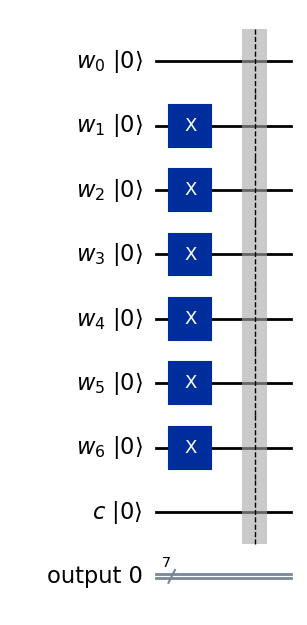

In [257]:
initial_position = 2 ** (n_walker_qubits - 1)  

initial_coin_value = 0  # The initial value of the coin is 0

def initialize_coined_walk_circuit(
    qc: QuantumCircuit,
    walker_r: QuantumRegister,
    coin_r: QuantumRegister,
    initial_position: int,
    initial_coin_value: int,
) -> QuantumCircuit:

    for i in range(n_walker_qubits):
        if initial_position & (1 << i):
            qc.x(walker_r[n_walker_qubits - i :n_walker_qubits])
    qc.barrier()
    return qc

qc, walker_r, coin_r, _ = coined_walk_circuit(n_walker_qubits)
qc = initialize_coined_walk_circuit(qc, walker_r, coin_r, initial_position, initial_coin_value)
qc.draw(output="mpl", initial_state=True)


**One-Step Coined Quantum Walk (Coin Flip + Conditional Shift)**

Applies H to the coin, then conditionally shifts the walker via cascaded MCX: first branch (coin=1) toggles bits forward, flips coin, second branch (coin=0) toggles bits backward, then restores coin.


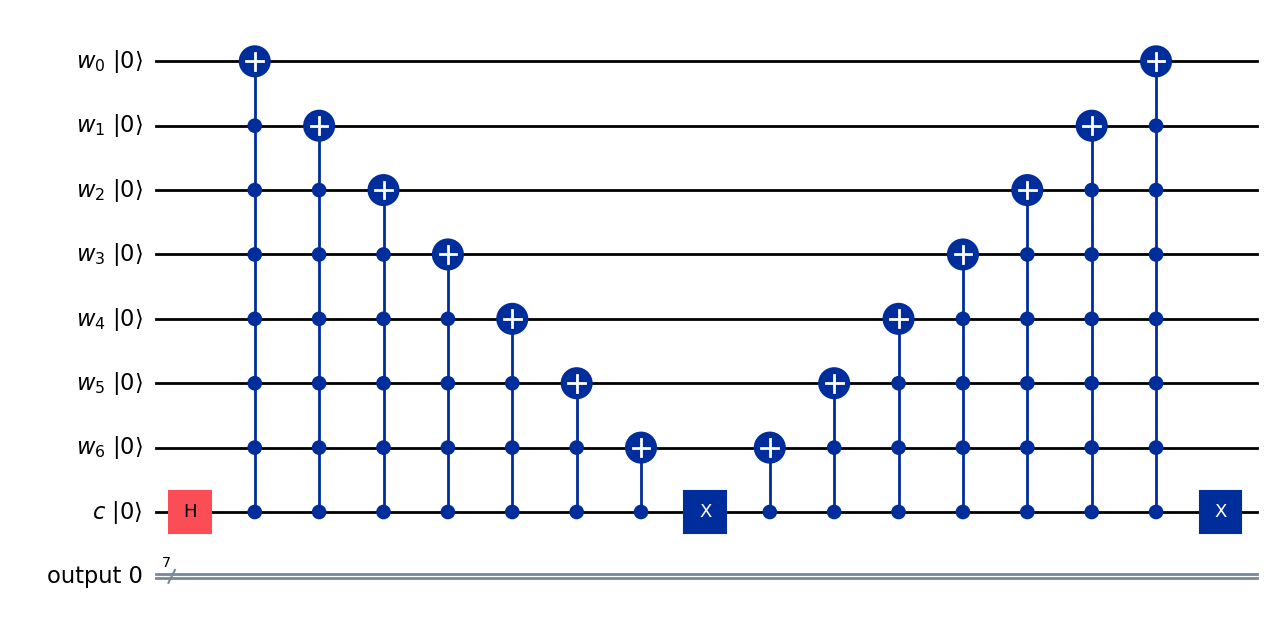

In [ ]:
def coined_walk_step(qc: QuantumCircuit, walker_r: QuantumRegister, coin_r: QuantumRegister) -> QuantumCircuit:

    # "Flip" the coin vector
    qc.h(coin_r)

    for i in range(len(walker_r)):
        controls = [walker_r[v] for v in range(len(walker_r) - 1, i, -1)]
        controls.append(coin_r)  # The coin qubit is also used as a control
        qc.mcx(controls, walker_r[i])  # Multi-controlled X gate

    # Switch the coin vector
    qc.x(coin_r)
         
    # Implement the Addition Operator
    for i in reversed(range(len(walker_r))):
        controls = [walker_r[v] for v in range(len(walker_r) - 1, i, -1)]
        controls.append(coin_r)  # The coin qubit is also used as a control
        qc.mcx(controls, walker_r[i])  # Multi-controlled X gate
    # Switch the coin vector
    qc.x(coin_r)
    # qc.h(coin_r)
    return qc


qc, walker_r, coin_r, _ = coined_walk_circuit(n_walker_qubits)
qc = coined_walk_step(qc, walker_r, coin_r)
qc.draw(output="mpl", initial_state=True)


**Multi-Step Coined Walk with Measurement**


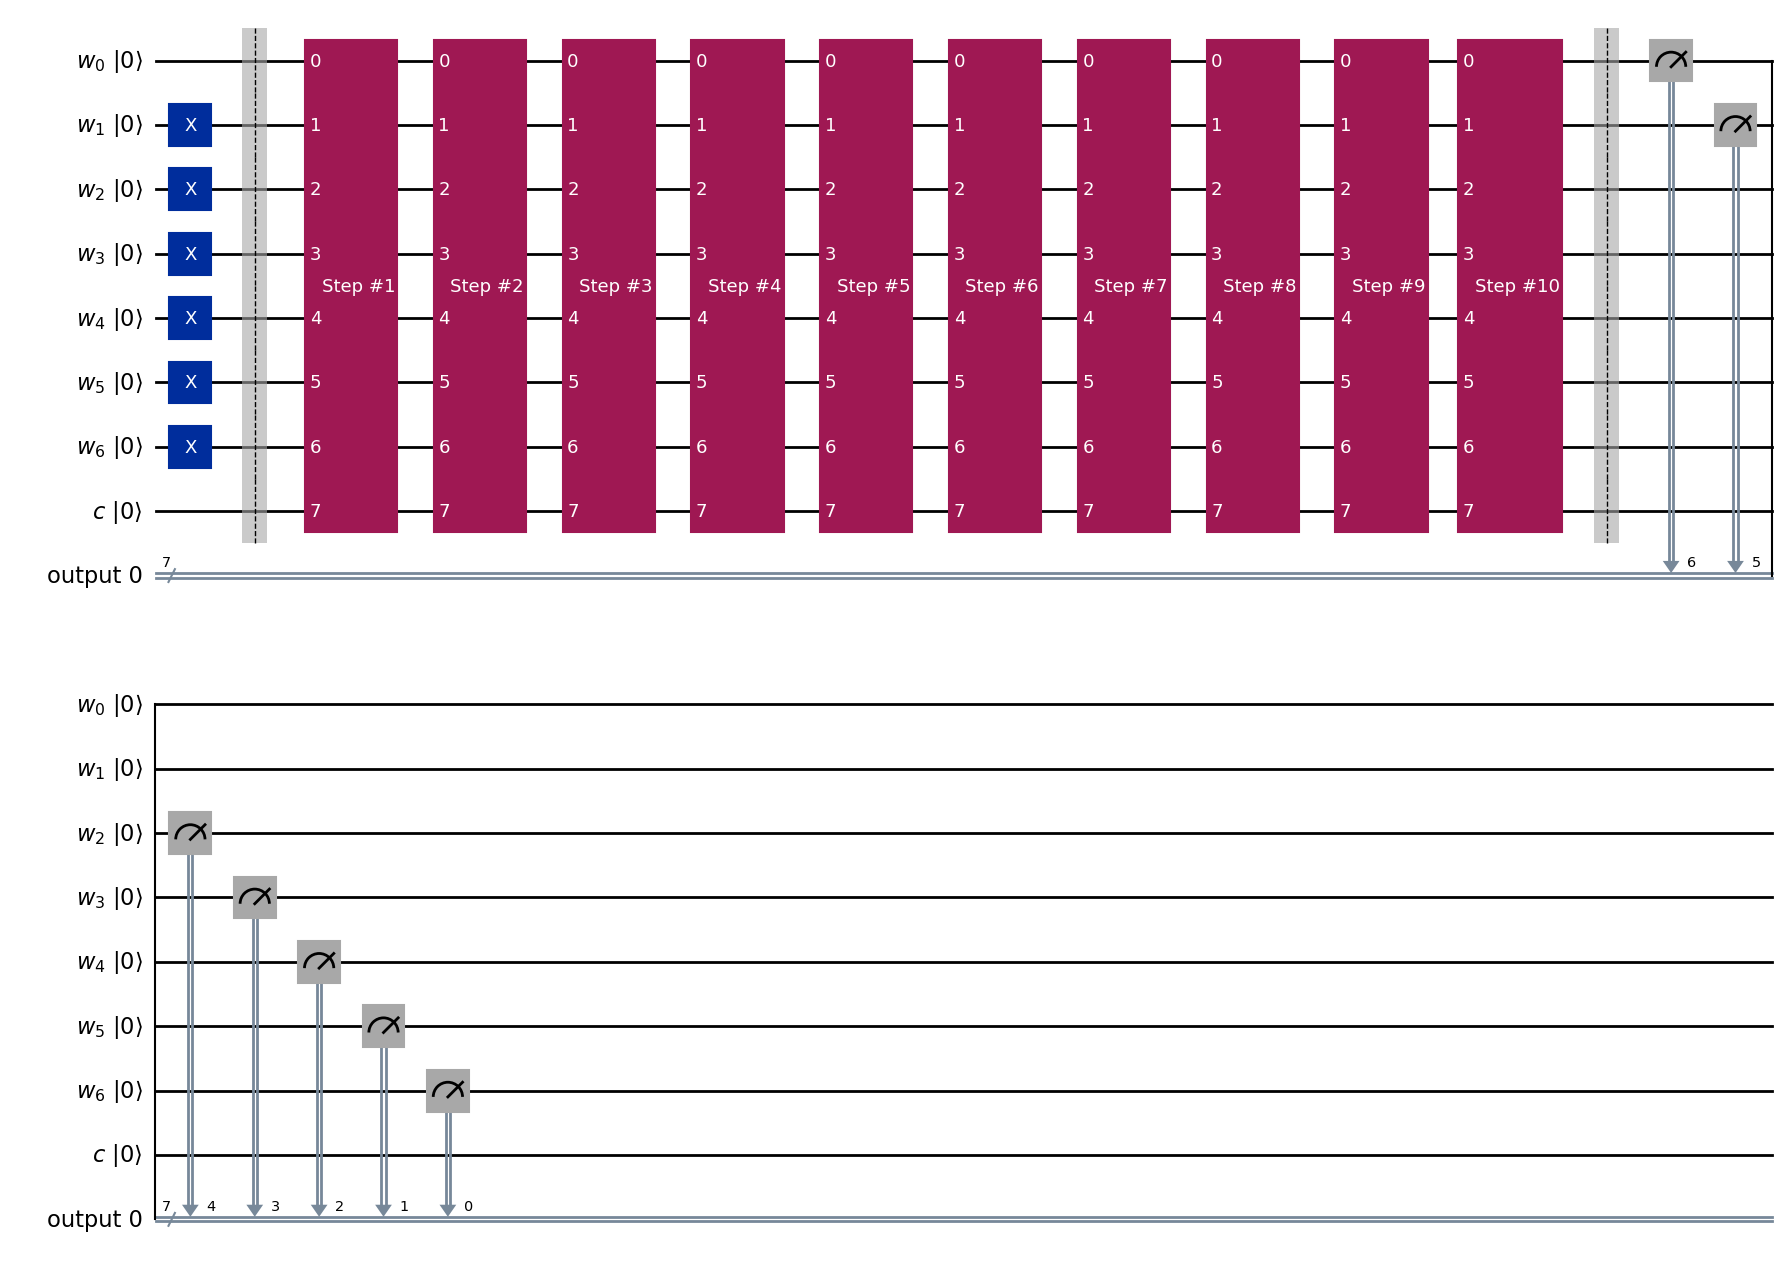

In [259]:
n_steps = 10

def coined_walk(
    n_walker_qubits: int,
    n_steps: int,
    initial_position: int,
    initial_coin_value: int,
    init_func: callable,
) -> QuantumCircuit:

    qc, walker_r, coin_r, classic_r = coined_walk_circuit(n_walker_qubits)
    qc = init_func(qc, walker_r, coin_r, initial_position, initial_coin_value)
    for i in range(n_steps):
        step_gate = coined_walk_step(QuantumCircuit(walker_r, coin_r), walker_r, coin_r)
        qc.append(step_gate.to_gate(label=f"Step #{i + 1}"), walker_r[:] + coin_r[:])
    
    qc.barrier()
    qc.measure(walker_r, reversed(classic_r))
    return qc

qc_muliple_walk = coined_walk(
    n_walker_qubits,
    n_steps,
    initial_position,
    initial_coin_value,
    initialize_coined_walk_circuit,
)
qc_muliple_walk.draw(output="mpl", initial_state=True)

**Simlarities**

1. **Quantum Arithmetic Primitives:**
   In Task B.1, the walker’s position register is manipulated using the same *increment/decrement logic* as Task 1. The controlled multi-qubit operations (`mcx` gates) act as modular adders or subtractors on the position qubits.

2. **Controlled Increment/Decrement:**
   The major difference is that, here, the arithmetic operation is **conditioned on the coin qubit**.

   * When the coin is (|1⟩), the increment (right shift) operator is applied.
   * When the coin is (|0⟩), the decrement (left shift) operator is applied after flipping the coin state.
     This builds directly on the increment/decrement modules from Task 1 but integrates them as **controlled versions** to encode directionality in the quantum walk.

The coined quantum walk step extends the arithmetic operators of Task 1 into a *conditional, superposed update rule*, where the coin qubit controls whether the same increment/decrement primitives act as left or right movement operations on the walker’s position register.



# **Task B.2** $-$ Measurement Distribution

Plot the distribution of your measurements running your circuit for 10, 20, and 30 walker iterations using a quantum computer simulator. Comment on the distributions you obtained:

---

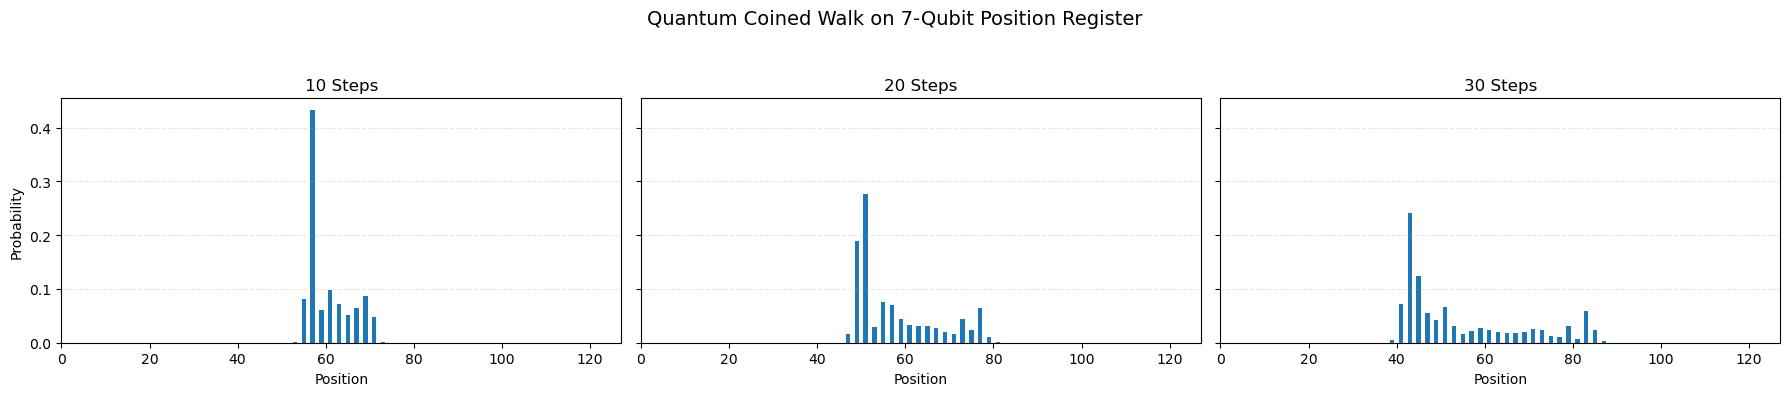

In [ ]:
n_walker_qubits = 7  # Number of qubits for position
initial_position = 2 ** (n_walker_qubits - 1)  # Start in middle
initial_coin_value = 0 
n_runs = 10_000  # Number of circuit runs (shots)

# --- Quantum walk function ---
def run_quantum_walk(n_steps: int):
    qc = coined_walk(
        n_walker_qubits,
        n_steps,
        initial_position,
        initial_coin_value,
        initialize_coined_walk_circuit,
    )

    simulator = Aer.get_backend("aer_simulator")
    transpiled_qc = transpile(qc, simulator)
    results = simulator.run(transpiled_qc, shots=n_runs).result()
    counts = results.get_counts(transpiled_qc)
    # Convert bitstrings to integer positions
    counts = {int(k, 2): v for k, v in counts.items()}
    return counts

step_counts = [10, 20, 30]
results = {steps: run_quantum_walk(steps) for steps in step_counts}

def counts_to_arrays(counts_dict, n_positions):
    """Return (positions, probabilities) sorted by position index."""
    shots = sum(counts_dict.values())
    positions = np.arange(n_positions)
    probs = np.zeros(n_positions, dtype=float)
    for k, v in counts_dict.items():
        if 0 <= k < n_positions:
            probs[k] = v / shots
    return positions, probs

n_positions = 2 ** n_walker_qubits
fig, axs = plt.subplots(1, len(step_counts), figsize=(18, 4), sharey=True)

for ax, steps in zip(axs, step_counts):
    pos, prob = counts_to_arrays(results[steps], n_positions)
    ax.bar(pos, prob, width=1.0)
    ax.set_title(f"{steps} Steps", fontsize=12)
    ax.set_xlabel("Position")
    ax.set_xlim(0, n_positions - 1)
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

axs[0].set_ylabel("Probability")
fig.suptitle("Quantum Coined Walk on 7-Qubit Position Register", fontsize=14)

# Make sure titles never get clipped
plt.tight_layout(rect=(0, 0, 1, 0.93))
plt.show()

For **10 steps**, the walker remains localized near the start.
At **20 steps**, interference causes the distribution to spread with multiple peaks.
By **30 steps**, the spread becomes wider and irregular due to constructive and destructive interference.
Unlike the classical Gaussian spread, the **quantum walk expands faster (variance ∝ T²)** and shows **asymmetric, non-Gaussian patterns** caused by **quantum interference**.

# Classical Walk Implementaion

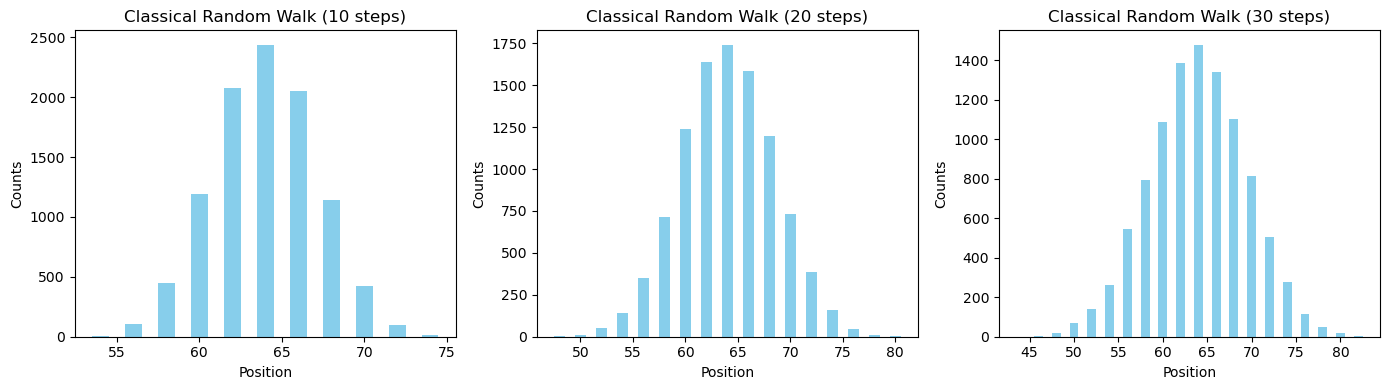

In [ ]:
def classical_random_walk(n_positions, n_steps, n_runs, initial_position):
    positions = np.full(n_runs, initial_position)
    for _ in range(n_steps):
        step = np.random.choice([-1, 1], size=n_runs)
        positions = (positions + step) % n_positions
    unique, counts = np.unique(positions, return_counts=True)
    return dict(zip(unique, counts))

# Parameters
n_positions = 2 ** n_walker_qubits
steps_list = [10, 20, 30]

plt.figure(figsize=(14, 4))
for i, n_steps in enumerate(steps_list, 1):
    counts = classical_random_walk(n_positions, n_steps, n_runs, initial_position)
    plt.subplot(1, 3, i)
    plt.bar(counts.keys(), counts.values(), width=1.0, color="skyblue")
    plt.title(f"Classical Random Walk ({n_steps} steps)")
    plt.xlabel("Position")
    plt.ylabel("Counts")

plt.tight_layout()
plt.show()


In the classical random walk, the walker moves left or right randomly at each step.
Over time, the distribution forms a **bell-shaped curve** that **spreads slowly** and remains **centered around the starting position**.
Unlike the quantum walk, there is **no interference**, so the spread grows only gradually with the number of steps.


**Spread Growth Comparison: Quantum vs Classical Random Walk**


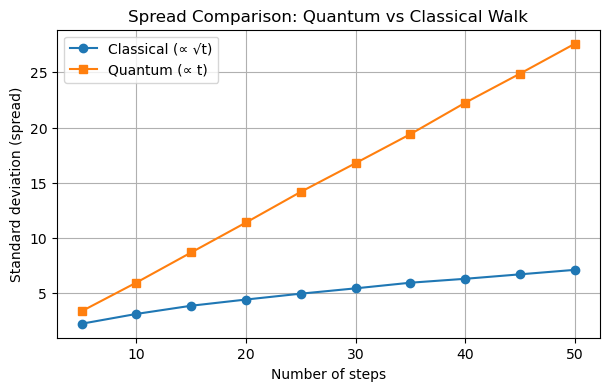

In [ ]:
def classical_walk_std(n_pos, n_steps, n_runs, start):
    pos = np.full(n_runs, start)
    for _ in range(n_steps):
        pos = (pos + np.random.choice([-1,1], n_runs)) % n_pos
    # Compute standard deviation relative to center
    diff = (pos - start + n_pos//2) % n_pos - n_pos//2
    return np.std(diff)

def quantum_walk_std(qc_func, n_pos, n_walker_qubits, n_steps, start, coin_val, n_runs):
    qc = qc_func(n_walker_qubits, n_steps, start, coin_val, initialize_coined_walk_circuit)
    simulator = Aer.get_backend("aer_simulator")
    counts = simulator.run(transpile(qc, simulator), shots=n_runs).result().get_counts()
    counts = {int(k,2):v for k,v in counts.items()}
    positions, probs = np.array(list(counts.keys())), np.array(list(counts.values()))/n_runs
    diff = (positions - start + n_pos//2) % n_pos - n_pos//2
    return np.sqrt(np.sum(probs * diff**2))

# --- Compare growth over steps ---
steps = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
n_pos = 2**n_walker_qubits

std_classical = [classical_walk_std(n_pos, s, n_runs, initial_position) for s in steps]
std_quantum = [quantum_walk_std(coined_walk, n_pos, n_walker_qubits, s, initial_position, initial_coin_value, n_runs) for s in steps]

plt.figure(figsize=(7,4))
plt.plot(steps, std_classical, 'o-', label="Classical (∝ √t)")
plt.plot(steps, std_quantum, 's-', label="Quantum (∝ t)")
plt.xlabel("Number of steps")
plt.ylabel("Standard deviation (spread)")
plt.title("Spread Comparison: Quantum vs Classical Walk")
plt.legend()
plt.grid(True)
plt.show()


**Comparison:**
The quantum walk differs significantly from the classical random walk. While the classical walk produces a smooth, bell-shaped (Gaussian-like) distribution centered around the starting point, the quantum walk shows two distinct probability peaks away from the center due to interference effects.

**Symmetry:**
With a balanced (Hadamard) coin, the quantum walk distribution is roughly symmetric about the initial position, although minor asymmetries can appear from interference phases or circuit noise.

**Speed of Spread:**
The quantum walk spreads **faster** than the classical walk, its standard deviation grows linearly with the number of steps, while the classical spread grows with the square root of steps.

**Quantum Effect:**
The main quantum effect is **interference** between probability amplitudes. Constructive and destructive interference enhance some paths and suppress others, producing the characteristic double-peak distribution and the faster overall spread.


# Task B.3 : Initial condition in superposition

**Initialization in Superposition of Two Positions**

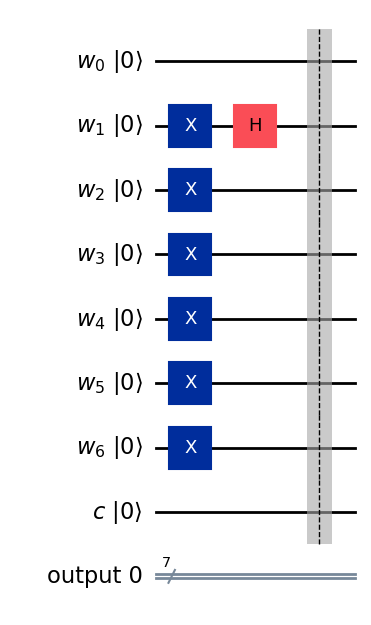

In [ ]:
def initialize_coined_walk_circuit_with_superposition(
    qc: QuantumCircuit,
    walker_r: QuantumRegister,
    coin_r: QuantumRegister,
    initial_position: int,
    initial_coin_value: int,
) -> QuantumCircuit:

    for i in range(n_walker_qubits):
        if initial_position & (1 << i):
            qc.x(walker_r[n_walker_qubits - i :n_walker_qubits])
            qc.h(walker_r[n_walker_qubits - i])
    qc.barrier()
    return qc
qc, walker_r, coin_r, _ = coined_walk_circuit(n_walker_qubits)
qc = initialize_coined_walk_circuit_with_superposition(qc, walker_r, coin_r, initial_position, initial_coin_value)
qc.draw(output="mpl", initial_state=True)

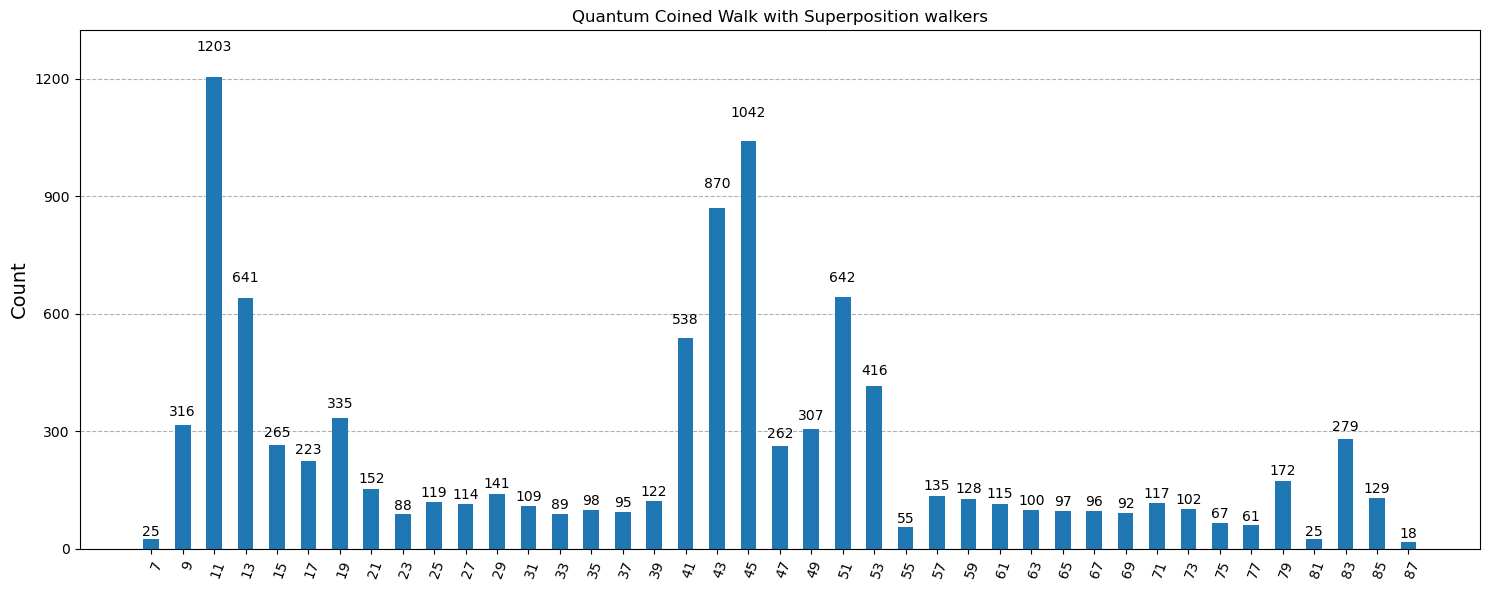

In [ ]:
n_walker_qubits = 7  
n_steps = 30  # The number of steps of the quantum walk
initial_position = 2 ** (n_walker_qubits - 1) 
initial_coin_value = 0 
n_runs = 10000  # The number of runs of the quantum circuit

qc = coined_walk(
    n_walker_qubits,
    n_steps,
    initial_position,
    initial_coin_value,
    initialize_coined_walk_circuit_with_superposition,
)

def plot_results(qc: QuantumCircuit, n_runs: int, title: str):

    simulator: AerSimulator = Aer.get_backend("aer_simulator")
    transpiled_qc = transpile(qc, simulator)
    results = simulator.run(transpiled_qc, shots=n_runs).result()
    counts = results.get_counts(transpiled_qc)
    counts = {int(k, 2): v for k, v in counts.items()}
    return plot_histogram(counts, title=title,figsize=(15,6))
plot_results(qc, n_runs, "Quantum Coined Walk with Superposition walkers")


Starting the quantum walk in a superposition of two positions causes the walker’s probability waves to interfere, producing a broader, multi-peaked distribution compared to the single-peaked drift seen in the single-position case.


# Task B.4 : RotY and Biased Quantum Walk

**Biased Coined Quantum Walk Step (RY Rotation)**

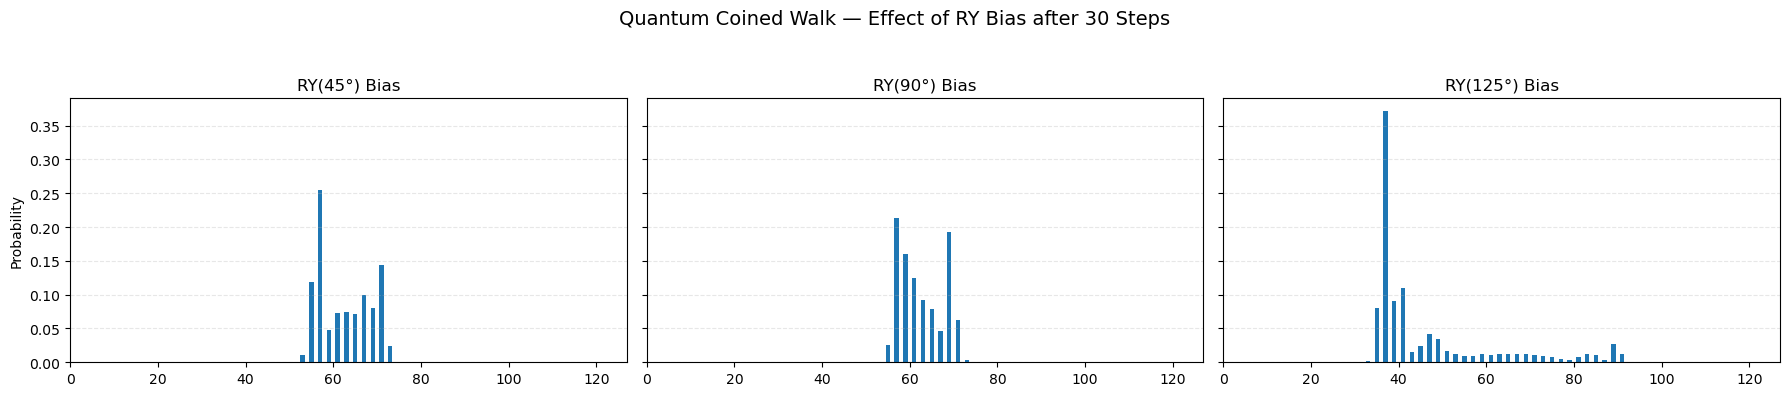

In [ ]:
n_walker_qubits = 7         # Number of qubits for walker positions
n_steps = 30                # Fixed number of steps
initial_position = 2 ** (n_walker_qubits - 1)
initial_coin_value = 0
n_runs = 10_000
angles = [45, 90, 125]      

# --- Quantum walk function (uses coined_walk_with_bias) ---
def run_quantum_walk_with_bias(angle_deg: int, n_steps: int):
    qc = coined_walk_with_bias(
        n_walker_qubits,
        n_steps,
        initial_position,
        initial_coin_value,
        initialize_coined_walk_circuit,
        angle_deg
    )

    simulator = Aer.get_backend("aer_simulator")
    tqc = transpile(qc, simulator)
    result = simulator.run(tqc, shots=n_runs).result()
    counts = result.get_counts(tqc)
    # Convert bitstrings → integer positions
    counts = {int(k, 2): v for k, v in counts.items()}
    return counts

# Run for each angle
results = {angle: run_quantum_walk_with_bias(angle, n_steps) for angle in angles}

# --- Helper: counts → arrays ---
def counts_to_arrays(counts_dict, n_positions):
    shots = sum(counts_dict.values())
    positions = np.arange(n_positions)
    probs = np.zeros(n_positions, dtype=float)
    for k, v in counts_dict.items():
        if 0 <= k < n_positions:
            probs[k] = v / shots
    return positions, probs

n_positions = 2 ** n_walker_qubits
fig, axs = plt.subplots(1, len(angles), figsize=(18, 4), sharey=True)

for ax, angle in zip(axs, angles):
    pos, prob = counts_to_arrays(results[angle], n_positions)
    ax.bar(pos, prob, width=1.0)
    ax.set_title(f"RY({angle}°) Bias", fontsize=12)
    # ax.set_xlabel("Position (decimal index)")
    ax.set_xlim(0, n_positions - 1)
    ax.grid(True, axis="y", linestyle="--", alpha=0.3)

axs[0].set_ylabel("Probability")
fig.suptitle(f"Quantum Coined Walk — Effect of RY Bias after {n_steps} Steps", fontsize=14)

plt.tight_layout(rect=(0, 0, 1, 0.93))
plt.show()


The **coin operator** sets the left/right amplitudes *and their relative phase* each step, so changing it changes (i) the **drift** (mean position), (ii) the **shape/spread** (how wide the walk is), and (iii) the **interference pattern** (fine ripples). A pure **ROTY** (i.e., `RY(θ)`) controls the *bias* (left vs right) but not the relative **phase**; adding phase (e.g., `RZ(φ)` coin) changes the interference without changing the single-step marginal bias.

**Designing a **biased** quantum walk with ROTY**

Suppose “right” is triggered by coin $(|1\rangle)$. You want a per-step rightward probability $(p_{\rm right})$. Choose
$[
\theta = 2\arcsin!\big(\sqrt{p_{\rm right}}\big)
\quad(\text{equivalently } p_{\rm right}=\sin^2(\theta/2)).
]$

Examples:

* $(p_{\rm right}=0.5 \Rightarrow \theta=90^\circ)$ (fair coin like Hadamard’s amplitudes, but no extra phase).
* $(p_{\rm right}=0.7 \Rightarrow \theta\approx 106.26^\circ)$.
* $(p_{\rm right}=0.9 \Rightarrow \theta\approx 142.12^\circ)$.

If you also want to **tune fringes** (not just drift), add a phase:
$[
C(\phi,\theta)=RZ(\phi),RY(\theta)
]$
(or $(RY(\theta),RZ(\phi))$; both are valid coins but produce different interference due to different relative phases entering the shift).


# Generative AI Disclosure

---

We used ChatGPT-5 and ChatGPT-4 for AI assistance during this assignment. A breakdown of the usage per task is shown below:

1. Task 1: Did not use any AI assistance.

2. Task 2: We used ChatGPT to assist with understanding DFT/FFT of a non-time valued signal, and for some help with graph labels. The conversation can be found [here](https://chatgpt.com/share/68dfcd3e-e89c-8009-b8fd-88398a69d2b3). We also used the DFT function found [here](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html).

3. Bonus: ChatGPT to make helper function for plotting. Conversation can be found [here](https://chatgpt.com/share/68dfd8c8-e284-8013-a403-e78e2ac0b6d6).